In [9]:
import numpy as np
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz
from graphviz import Digraph

# Graph Random Walk

## **1)**

Make a picture of your graph with arrows showing the directions of the edges.

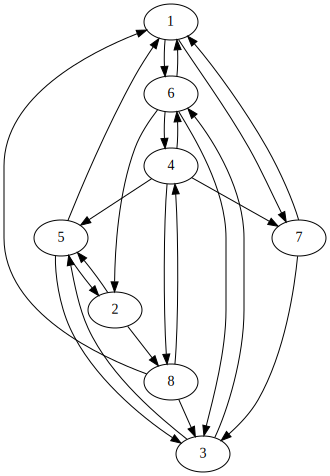

In [53]:
G = [[0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0]]
V = ['1', '2', '3', '4', '5', '6', '7', '8']
graph = Digraph(comment='Random Walk Graph')
for v in V:
  graph.node(v)
for i in range(len(G)):
  for j in range(len(G[i])):
    if G[i][j] == 1:
      graph.edge(V[i], V[j])
graph.view()
with open("Digraph.gv") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## **2)**

Convert the adjacency matrix into a transition matrix and call that A.

In [54]:
Trans = np.array([np.array(ele) for ele in G])
print(Trans)

[[0 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1 1]
 [1 1 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0]]


In [55]:
A = np.array([Trans[:,i] for i in range(len(Trans[0]))])
print(A)

[[0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 1]
 [0 1 1 1 0 0 0 0]
 [1 0 1 1 0 0 0 0]
 [1 0 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0]]


In [56]:
A = np.array([A[i]/np.sum(A[i]) for i in range(len(A))])
print(A)

[[0.         0.         0.         0.         0.25       0.25
  0.25       0.25      ]
 [0.         0.         0.         0.         0.5        0.5
  0.         0.        ]
 [0.         0.         0.         0.         0.25       0.25
  0.25       0.25      ]
 [0.         0.         0.         0.         0.         0.5
  0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.5        0.         0.         0.5        0.         0.
  0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.        ]]


## **3)**

After converting to decimals, compute  $A^2$, $A^4$, $A^8$, $A^{16}$

In [57]:
A2 = A.dot(A)
A4 = A2.dot(A2)
A8 = A4.dot(A4)
A16 = A8.dot(A8)

## **4)**

Is there a dominant eigenvector?  How many eigenvalues have absolute value 1?

### Printing Out Prior Values to Observe Convergence

In [58]:
print('A16: \n {}'.format(A16))
print('----------------------------------------')
print('A8: \n {}'.format(A8))
print('----------------------------------------')
print('A4: \n {}'.format(A4))
print('----------------------------------------')
print('A2: \n {}'.format(A2))
print('----------------------------------------')
print('A: \n {}'.format(A))

A16: 
 [[0.18272425 0.21594684 0.20265781 0.3986711  0.         0.
  0.         0.        ]
 [0.18272425 0.21594684 0.20265781 0.3986711  0.         0.
  0.         0.        ]
 [0.18272425 0.21594684 0.20265781 0.3986711  0.         0.
  0.         0.        ]
 [0.18272425 0.21594684 0.20265781 0.3986711  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.20431894 0.40365448
  0.09634552 0.29568106]
 [0.         0.         0.         0.         0.20431894 0.40365449
  0.09634551 0.29568106]
 [0.         0.         0.         0.         0.20431894 0.40365449
  0.09634551 0.29568106]
 [0.         0.         0.         0.         0.20431894 0.40365448
  0.09634552 0.29568106]]
----------------------------------------
A8: 
 [[0.18272871 0.21594389 0.2026548  0.3986726  0.         0.
  0.         0.        ]
 [0.18271364 0.21594088 0.20269097 0.39865451 0.         0.
  0.         0.        ]
 [0.18272871 0.21594389 0.2026548  0.3986726  0.         0.
  0

### Calculating Eigenvalues & vectors and Final Answer

In [59]:
eig_vals, eig_vecs = np.linalg.eig(A)
print(eig_vals)

[ 1.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
  1.38007666e-01+1.99698396e-01j  1.38007666e-01-1.99698396e-01j
 -1.38007666e-01+1.99698396e-01j -1.38007666e-01-1.99698396e-01j
 -4.56036009e-17+1.45479988e-16j -4.56036009e-17-1.45479988e-16j]


In [60]:
for eig in eig_vals:
  print(eig.real ** 2 + eig.imag ** 2)

0.9999999999999996
1.0000000000000027
0.05892556509887899
0.05892556509887899
0.05892556509887889
0.05892556509887889
2.3244115196621623e-32
2.3244115196621623e-32


As we can see above there are **2 eigenvalues** with an absolute value of 1. Their corresponding vectors are listed below. As observed above, it is clear that these **2 eigenvectors are the dominant eigenvectors** as all other eigenvalues are close to 0.

Hence, the following is the final answer

In [67]:
print('eigenvalue: \n {} \n with corresponding eigenvector \n {}'.format(eig_vals[0].real, eig_vecs[:,0].real))
print('eigenvalue: \n {} \n with corresponding eigenvector \n {}'.format(eig_vals[1].real, eig_vecs[:,1].real))

eigenvalue: 
 0.9999999999999998 
 with corresponding eigenvector 
 [-0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
 -0.35355339 -0.35355339]
eigenvalue: 
 -1.0000000000000013 
 with corresponding eigenvector 
 [-0.35355339 -0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  0.35355339  0.35355339]


## **5)**

What is the eigenvector of A with eigenvalue 1?   Convert to a probability vector. Compare question (3)

Shown in 4 is the corresponding eigenvector for eigenvalue = 1. It is rewritten below:

$\vec{\lambda_{1}} = \begin{pmatrix} -0.35355339 \\ -0.35355339 \\ -0.35355339 \\ -0.35355339 \\-0.35355339\\ -0.35355339\\ -0.35355339 \\ -0.35355339 \end{pmatrix}$

Below we convert to probability vector and compare to 3

In [72]:
eig_vecs

array([[-3.53553391e-01+0.00000000e+00j, -3.53553391e-01+0.00000000e+00j,
         1.33684218e-01+8.57784050e-03j,  1.33684218e-01-8.57784050e-03j,
         1.33684218e-01-8.57784050e-03j,  1.33684218e-01+8.57784050e-03j,
         3.99220299e-01+2.03913019e-16j,  3.99220299e-01-2.03913019e-16j],
       [-3.53553391e-01+0.00000000e+00j, -3.53553391e-01+0.00000000e+00j,
        -2.62398879e-02-4.27865370e-01j, -2.62398879e-02+4.27865370e-01j,
        -2.62398879e-02+4.27865370e-01j, -2.62398879e-02-4.27865370e-01j,
         3.99220299e-01-1.84456423e-16j,  3.99220299e-01+1.84456423e-16j],
       [-3.53553391e-01+0.00000000e+00j, -3.53553391e-01+0.00000000e+00j,
         1.33684218e-01+8.57784050e-03j,  1.33684218e-01-8.57784050e-03j,
         1.33684218e-01-8.57784050e-03j,  1.33684218e-01+8.57784050e-03j,
        -3.46956433e-16+4.50259358e-17j, -3.46956433e-16-4.50259358e-17j],
       [-3.53553391e-01+0.00000000e+00j, -3.53553391e-01+0.00000000e+00j,
        -1.15014805e-01+2.23468496e

In [71]:
eig_vec_l1 = eig_vecs[:,0].copy().real
prob_eig_vec_l1 = eig_vec_l1/np.sum(eig_vec_l1)
print(prob_eig_vec_l1)

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [74]:
for ele in A16:
  print('L2 norm squared is: {}'.format(np.linalg.norm(ele - prob_eig_vec_l1) ** 2))

L2 norm squared is: 0.15503002176718494
L2 norm squared is: 0.15503002173772762
L2 norm squared is: 0.15503002176718494
L2 norm squared is: 0.15503002172420624
L2 norm squared is: 0.17639292050564118
L2 norm squared is: 0.1763929206849204
L2 norm squared is: 0.17639292078482183
L2 norm squared is: 0.17639292051590294


Above are the L2 norm squared values of the difference between the individual vectors in $A_{16}$ and the probability vector derived from the eigenvector associated with $\lambda = 1$

It is clear when comparing with earlier matrices, the L2 norm squared values have converged to the values above.

## **6)**

Make another picture of your graph highlighting the difference in frequencies between the vertices in the stable eigenvector from (5).

Because our probability vector produced in **5** had even probabilities throughout all possible states, there is no difference in frequencies that exists. Hence all of our vertices are of the same size.

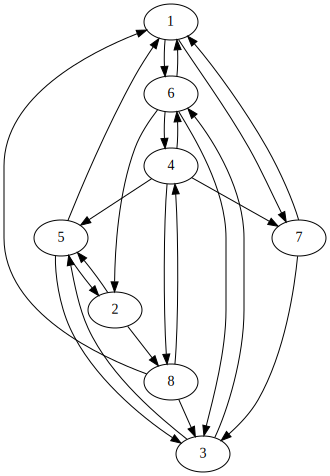

In [76]:
with open("Digraph.gv") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

All vertices are equally likely per our vector produced in 5.

## **7)**

Compute a random walk for 20 steps starting from the first vertex.  How do the frequencies of node visits compare to (6)?  Explain using your answer to (4)

In [83]:
print(A)

[[0.         0.         0.         0.         0.25       0.25
  0.25       0.25      ]
 [0.         0.         0.         0.         0.5        0.5
  0.         0.        ]
 [0.         0.         0.         0.         0.25       0.25
  0.25       0.25      ]
 [0.         0.         0.         0.         0.         0.5
  0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.5        0.         0.         0.5        0.         0.
  0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.        ]]


In [82]:
M = np.array([A[i].copy().cumsum() for i in range(len(A))])
print(M)

[[0.         0.         0.         0.         0.25       0.5
  0.75       1.        ]
 [0.         0.         0.         0.         0.5        1.
  1.         1.        ]
 [0.         0.         0.         0.         0.25       0.5
  0.75       1.        ]
 [0.         0.         0.         0.         0.         0.5
  0.5        1.        ]
 [0.         0.33333333 0.66666667 1.         1.         1.
  1.         1.        ]
 [0.33333333 0.33333333 0.66666667 1.         1.         1.
  1.         1.        ]
 [0.5        0.5        0.5        1.         1.         1.
  1.         1.        ]
 [0.         0.5        0.5        1.         1.         1.
  1.         1.        ]]


In [87]:
states = [0]
for i in range(20):
  rando_num = np.random.uniform()
  j = 0
  while rando_num > M[states[-1]][j]:
    j += 1
  states.append(j)
for i in range(len(states)):
  states[i] += 1
states

[1, 7, 1, 7, 4, 6, 4, 6, 3, 7, 4, 8, 2, 5, 3, 7, 1, 5, 4, 6, 4]

In [88]:
import collections
freq = dict(collections.Counter(states))
freq

{1: 3, 2: 1, 3: 2, 4: 5, 5: 2, 6: 3, 7: 4, 8: 1}

In comparision with 6, we do not see convergence of our frequencies. States 1, 4, and 7 have the highest values when they are encountered, while State 8 and 2 are only reached once. This is most likely due to a low transition count because our eigen vectors all had the same value in our answer from **4**.

# **Random Walk on the integers**

## **8)**

Compute a random walk on the integers starting from 0 going for 100 steps. 

In [89]:
start = [0]
for i in range(100):
  rando_num = np.random.uniform()
  if rando_num > 0.5:
    start.append(start[-1] + 1)
  else:
    start.append(start[-1] - 1)
start

[0,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -3,
 -4,
 -5,
 -4,
 -3,
 -4,
 -5,
 -4,
 -5,
 -4,
 -5,
 -6,
 -7,
 -8,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -4,
 -5,
 -4,
 -5,
 -4,
 -5,
 -6,
 -7,
 -6,
 -5,
 -6,
 -7,
 -8,
 -7,
 -8,
 -7,
 -8,
 -7,
 -8,
 -9,
 -8,
 -9,
 -8,
 -7,
 -8,
 -9,
 -10,
 -11,
 -12,
 -13,
 -14,
 -15,
 -16,
 -15,
 -16,
 -15,
 -16,
 -15,
 -14,
 -13,
 -14,
 -13,
 -12,
 -13,
 -12,
 -13,
 -14,
 -15,
 -14,
 -13,
 -12,
 -13,
 -14,
 -13,
 -14,
 -13,
 -12,
 -11,
 -12,
 -11,
 -10,
 -11,
 -12,
 -13,
 -12,
 -11,
 -12,
 -13,
 -12,
 -11,
 -12,
 -11,
 -10]

## **9)**

Take the absolute value and make a plot.

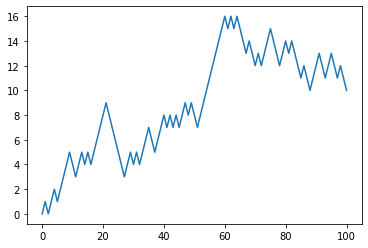

In [90]:
vals = np.absolute(start)
plt.plot(vals)
plt.show()

## **10)**

Compare your plot to a plot of y=x and to a plot of y=Sqrt[x]

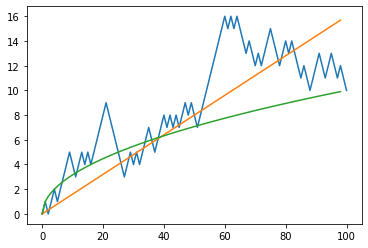

In [91]:
plt.plot(vals)
x = np.arange(0,99)
w, b = 0.16, 0
y = w * x + b
plt.plot(y)
plt.plot(np.sqrt(x))
plt.show()

Our plot does seem to resemble a $y = \sqrt{x}$ graph.